## Fake Job Posting :


In [62]:
!pip install textblob

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [64]:
df = pd.read_csv('fake_job_postings.csv')
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
15451,15452,Senior Business Development Manager,"GB, LND, London",Client Services,60000-80000,Founded in 2010 by a team from Google’s London...,Qubit: Cutting Edge Big Data EngineeringAt Qub...,What We Are Looking ForBy submitting your appl...,Plenty of perksAs well as the opportunity to s...,0,1,1,Full-time,Mid-Senior level,Professional,Internet,Business Development,0
7481,7482,Professional Development Coordinator (Perioper...,"US, CT,",NaN,NaN,NaN,Apply using below link#URL_ad7066040069336a9ba...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1
163,164,Customer Service Associate - Data Entry,"US, CT, Windsor",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",We are currently seeking Customer Service Asso...,Required Qualifications:Previous data entry ex...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0
7308,7309,Financial Advisor,"US, CA, San Francisco",NaN,NaN,deVere Group is the one of the largest and mos...,deVere USA is looking for experienced financia...,Ideally possess Series 65 or 66 qualificationS...,Freedom to grow your own client baseVarious re...,0,1,0,Full-time,NaN,High School or equivalent,Financial Services,Consulting,0
13448,13449,Sales and Marketing Executive,"GB, BAS, Bath",NaN,16000-20000,NaN,We're looking for a Sales and Marketing Manage...,Pong is the combination of your two favourite ...,NaN,0,0,1,Full-time,Associate,NaN,Food & Beverages,Marketing,0


In [65]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.isnull().sum().sort_values(ascending=False)

salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

In [67]:
df.drop(columns = ['salary_range'], inplace=True)

In [68]:
df['company_profile'] = df['company_profile'].fillna("unknown")

In [69]:
df = df.drop(['job_id', 'department'], axis=1)

In [70]:
df['text'] = df[['title', 'company_profile', 'description', 'requirements', 'benefits']].astype(str).agg(' '.join, axis=1)

In [71]:
df['employment_type'] = df['employment_type'].fillna("unknown")

In [72]:
df = pd.get_dummies(df, columns=['employment_type', 'required_experience'])

## Part 2: EDA (Exploratory Data Analysis)


### 1. Class Balance Check


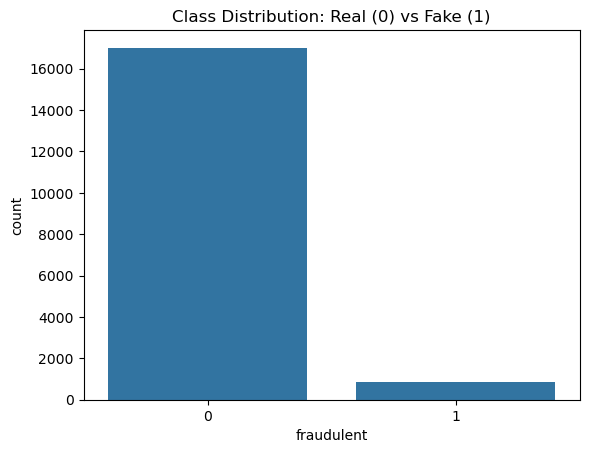

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64


In [73]:
sns.countplot(x='fraudulent', data=df)
plt.title("Class Distribution: Real (0) vs Fake (1)")
plt.show()

print(df['fraudulent'].value_counts(normalize=True) * 100)

### 2. Text Length Analysis


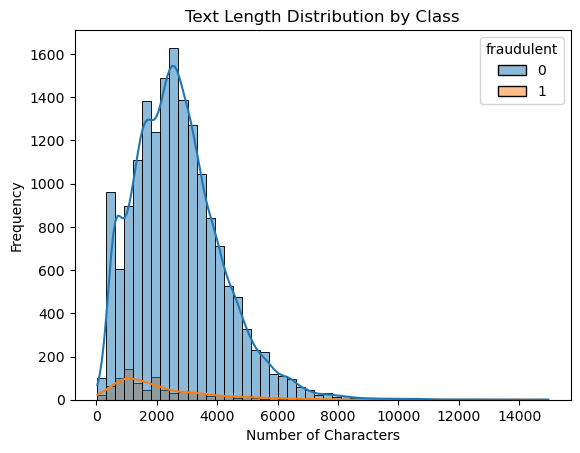

In [74]:
df['text_length'] = df['text'].apply(len)

sns.histplot(data=df, x='text_length', hue='fraudulent', bins=50, kde=True)
plt.title("Text Length Distribution by Class")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


### 3. Word Clouds (Real vs Fake Jobs)


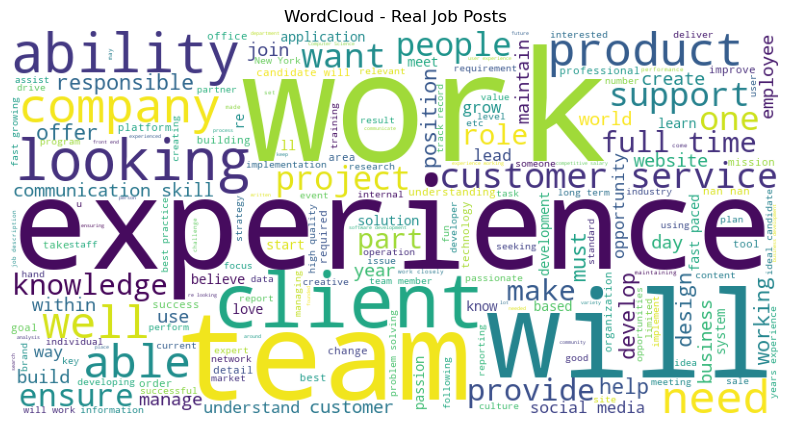

In [75]:
real_text = " ".join(df[df['fraudulent']==0]['text'].dropna().tolist())
fake_text = " ".join(df[df['fraudulent']==1]['text'].dropna().tolist())

# Real job posts
plt.figure(figsize=(10,5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(real_text))
plt.axis('off')
plt.title("WordCloud - Real Job Posts")
plt.show()

### 4. Suspicious Keyword Detection


In [ ]:
scam_words = ['click', 'apply now', 'investment', 'urgent', 'winner', 'credit card', 'free', 'wire transfer' ,'No experience' , 'individuals needed', 'work from home', 'earn money', 'guaranteed income', 'limited time offer', 'risk-free', 'exclusive deal', 'act now', 'urgent response required']

for word in scam_words:
    df[f'has_{word.replace(" ", "_")}'] = df['text'].str.contains(word, case=False).astype(int)

scam_cols = [col for col in df.columns if col.startswith('has_')]
df[scam_cols + ['fraudulent']].groupby('fraudulent').mean().T.sort_values(by=1, ascending=False)

fraudulent,0,1
has_company_logo,0.819149,0.326790
has_questions,0.502057,0.288684
has_free,0.170330,0.101617
has_click,0.055836,0.053118
has_urgent,0.020042,0.047344
has_investment,0.041672,0.021940
has_credit_card,0.047138,0.019630
has_apply_now,0.062596,0.013857
has_winner,0.008464,0.002309
has_wire_transfer,0.002351,0.000000


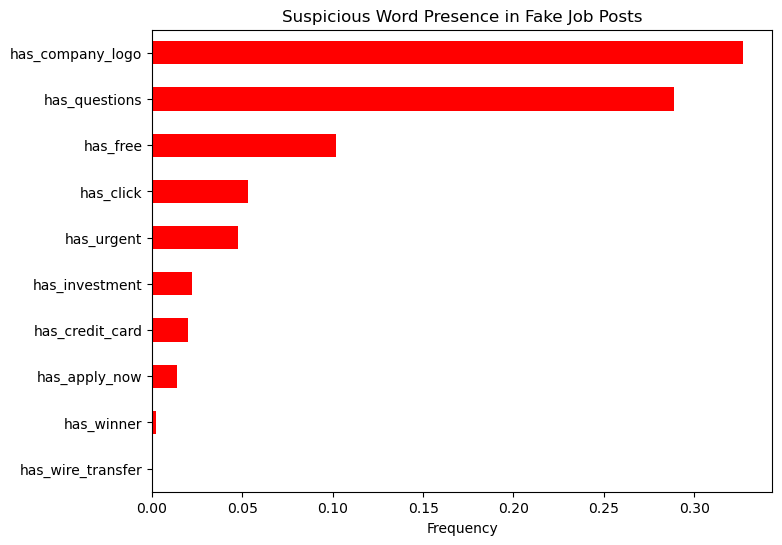

In [77]:
scam_word_means = df[df['fraudulent']==1][scam_cols].mean()
scam_word_means.sort_values().plot(kind='barh', figsize=(8, 6), color='red')
plt.title("Suspicious Word Presence in Fake Job Posts")
plt.xlabel("Frequency")
plt.show()

### 5. NLP-Based Sentiment Analysis


C:\Users\ritik\AppData\Local\Temp\ipykernel_3252\3515212937.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='sentiment', hue='fraudulent', shade=True)


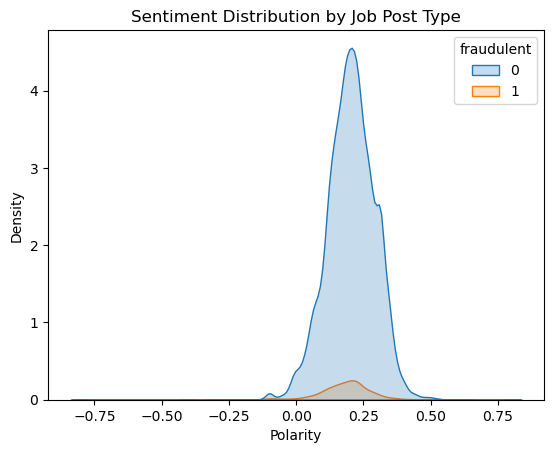

In [78]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sns.kdeplot(data=df, x='sentiment', hue='fraudulent', shade=True)
plt.title("Sentiment Distribution by Job Post Type")
plt.xlabel("Polarity")
plt.show()

### 7. Feature Importance Preview


In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['text'].apply(lambda x: len(str(x).split('.')))

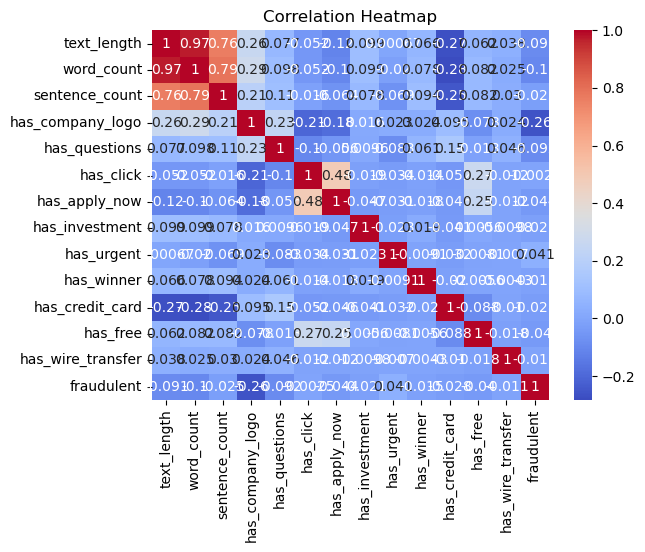

In [88]:
corr_features = ['text_length', 'word_count', 'sentence_count'] + scam_cols
df_corr = df[corr_features + ['fraudulent']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Model Building


In [89]:
df = df[['text', 'fraudulent']].dropna()

#### Train-Test Split


In [90]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Text Vectorization


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Model Training


In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
y_rf_pred = rf_model.predict(X_test_vec)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Accuracy: 0.979586129753915
[[3403    0]
 [  73  100]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.58      0.73       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576



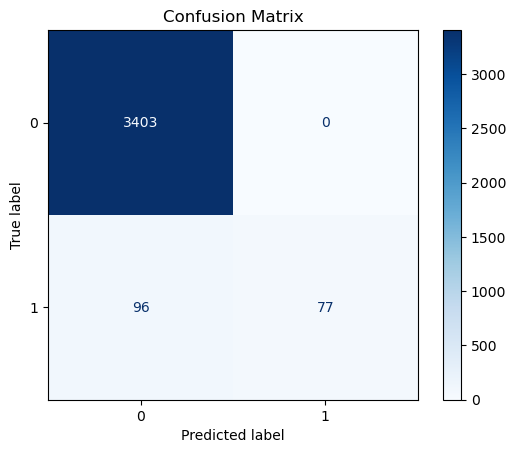

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [99]:
import pickle

# Save model
with open('fake_job_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)